In this video, I made plots of lidar data including
1. DEM
2. Vegeation height (DSM-DEM) for bothe snow-on and snow-off
3. Snow Depth (DEM snow-on - DEM snow off)
4. Plots of the 3 above.
5. Overview map of western US showing each LIDAR area. maybe another map for each state


In [4]:
#import packages

import numpy as np
import rioxarray
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import hvplot.xarray
import matplotlib.pyplot as plt

In [2]:
#read the DSM and DEM raster files
DSM = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lidar/results/Cameron/Cameron_DSMs_mosaic.tif')
DEM = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lidar/results/Cameron/Cameron_Bare_Earth_DEMs_mosaic.tif')

#Compute the vegetation height
VH = DSM - DEM
VH

<xarray.DataArray (band: 1, y: 18000, x: 12000)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.215e+05 4.215e+05 ... 4.275e+05 4.275e+05
  * y            (y) float64 4.492e+06 4.492e+06 ... 4.484e+06 4.484e+06
    spatial_ref  int64 0

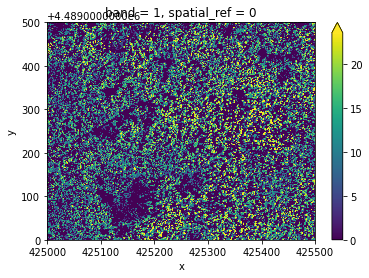

In [50]:
#plot subset of the array 
(VH.squeeze())[6000:7000, 7000:8000].plot(robust = True)

In [14]:
# safe the vegetation height raster
VH.rio.to_raster('/home/naheemadebisi/snow-analytics/lidar/results/Cameron/Cameron_VH.tif')


In [3]:
#replace zero with NaN
VH_ = VH.where(VH != 0, np.nan)
VH_


<xarray.DataArray (band: 1, y: 18000, x: 12000)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.215e+05 4.215e+05 ... 4.275e+05 4.275e+05
  * y            (y) float64 4.492e+06 4.492e+06 ... 4.484e+06 4.484e+06
    spatial_ref  int64 0

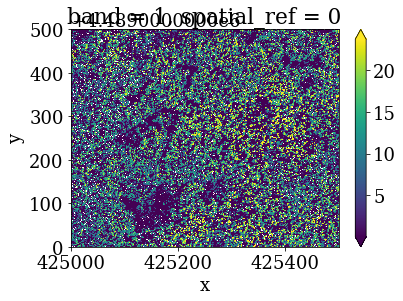

In [7]:
#plot the DataArray
test = VH_.squeeze()[6000:7000, 7000:8000]
test.plot(robust = True)

In [53]:
# safe the vegetation height raster
VH.rio.to_raster('/home/naheemadebisi/snow-analytics/lidar/results/Cameron/Cameron_VH_.tif')

#Customize the plot

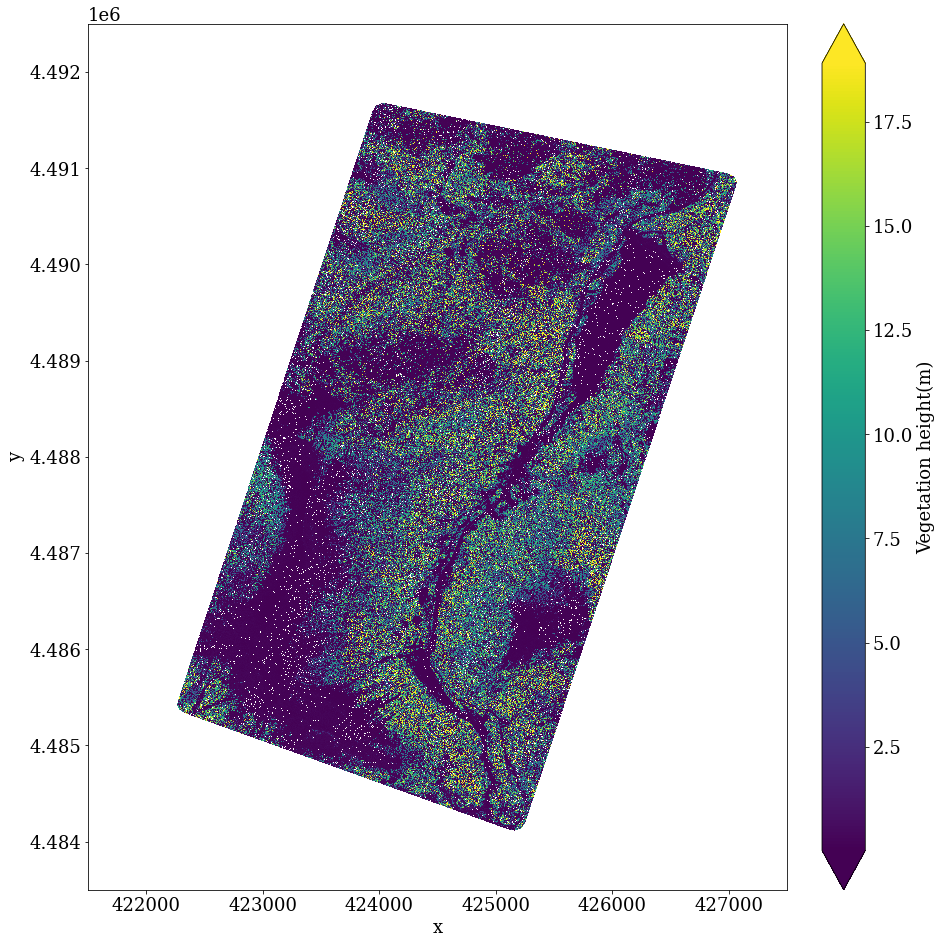

In [20]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(15,13), constrained_layout=True)

#plot lidar differenced DEMs
VH_.plot(ax=ax, cmap = 'viridis', robust = True, cbar_kwargs={'label': 'Vegetation height(m)'})

#set title
ax.set_title('')


plt.show()

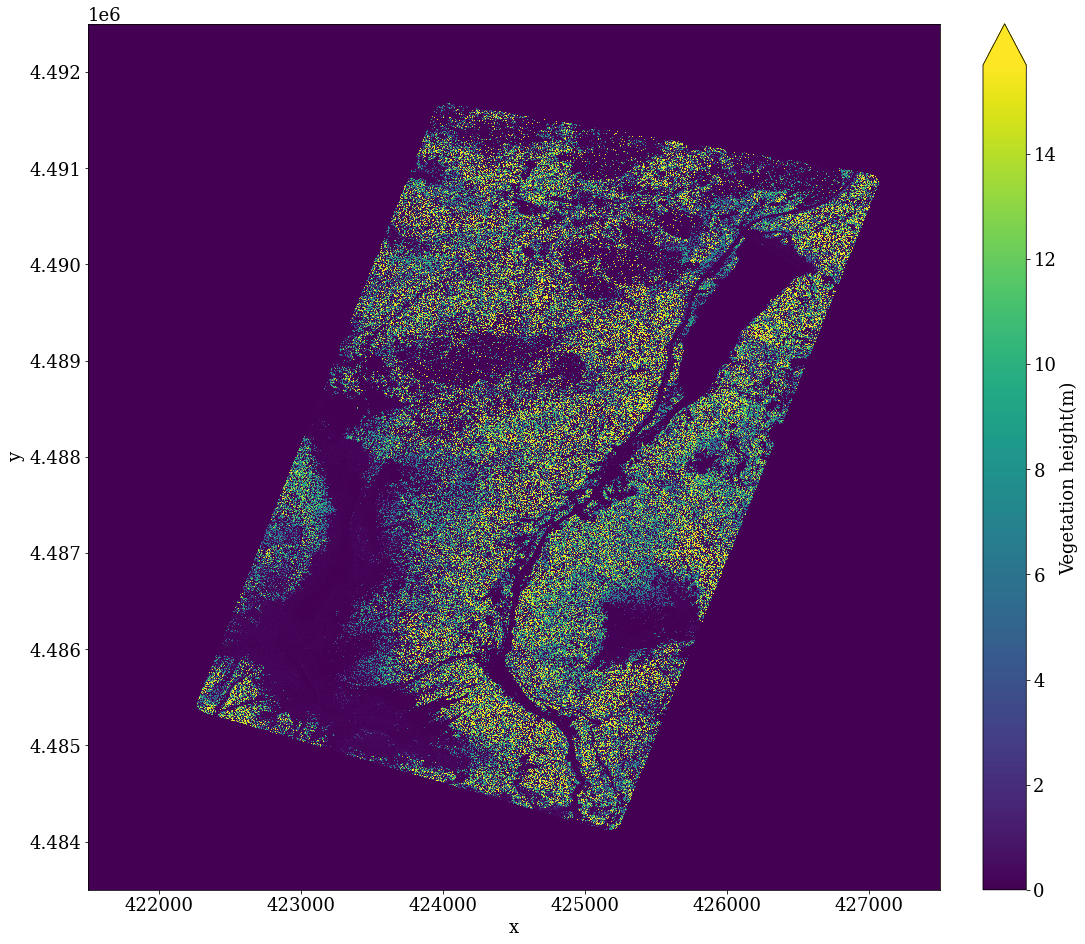

In [21]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(15,13), constrained_layout=True)

#plot lidar differenced DEMs
VH.plot(ax=ax, cmap = 'viridis', robust = True, cbar_kwargs={'label': 'Vegetation height(m)'})

#set title
ax.set_title('')


plt.show()